# Situation: 
Jack has recently joined company X. Passionate about machine learning, he wishes to put together a file for management on some of its capabilities. He is aware that his team members are not well versed in data and machine learning. As such he believes a decision tree may been an ideal option given that its process can be visualised. He also wants to keep his work to a minimum as he is unsure of the outcome of such a project. 

Subsequently he has requested for a decision tree model to be created using a simple dataset to classify the gender of an individual. He believes that a such a model can later be used to explain how unknown information can be deduced with enough related information. A common issue his company faces in its day to day actions.

# Overview
Based on Jack's requirement model tuning and accuracy at this stage is not required. A simple data cleaning and a model should suffice. That said, the data he has singled out has some issues such as extra white spacing that can interfere with the modelling process. 

In [1]:
# import data handling libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import library to read in data
import os

# import visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# read in data, clean up column names
df = pd.read_csv("/kaggle/input/simple-gender-classification/gender.csv")
df.drop("Unnamed: 9", axis =1, inplace = True)
df.columns = df.columns.str.strip()
df.head()

,Gender,Age,Height (cm),Weight (kg),Occupation,Education Level,Marital Status,Income (USD),Favorite Color
0,male,32,175,70,Software Engineer,Master's Degree,Married,75000,Blue
1,male,25,182,85,Sales Representative,Bachelor's Degree,Single,45000,Green
2,female,41,160,62,Doctor,Doctorate Degree,Married,120000,Purple
3,male,38,178,79,Lawyer,Bachelor's Degree,Single,90000,Red
4,female,29,165,58,Graphic Designer,Associate's Degree,Single,35000,Yellow


Therefore, with some minor data cleaning the data is ready for  modelling. 

In [2]:
# remove white space from column name 
for column in df:
    if df[column].dtype == 'object':
        df[column] = df[column].str.strip()

# view metrics for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           131 non-null    object
 1   Age              131 non-null    int64 
 2   Height (cm)      131 non-null    int64 
 3   Weight (kg)      131 non-null    int64 
 4   Occupation       131 non-null    object
 5   Education Level  131 non-null    object
 6   Marital Status   131 non-null    object
 7   Income (USD)     131 non-null    int64 
 8   Favorite Color   131 non-null    object
dtypes: int64(4), object(5)
memory usage: 9.3+ KB


Prior to this, it would be advisable for Jack to conduct a preliminary investigation on how the data is distributed.   This would ensure that any anomaly in the data can be effectively identified. The following are such graphs. 

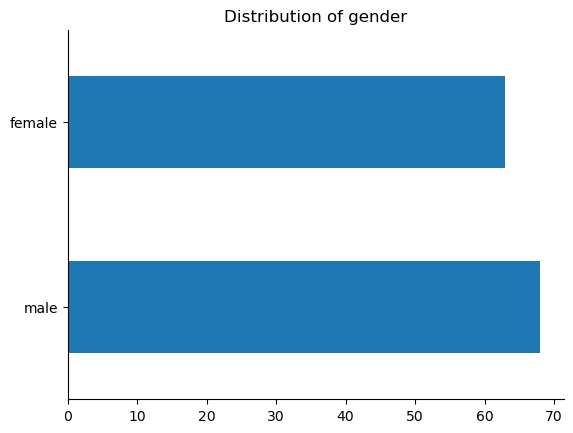

In [3]:
df["Gender"].value_counts().plot(kind = "barh")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of gender")
plt.show()

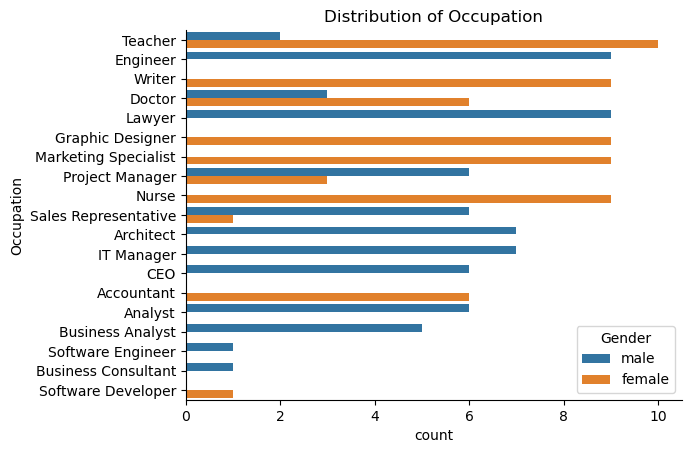

In [4]:
sns.countplot(data = df, y = "Occupation", hue = "Gender", 
              order = df['Occupation'].value_counts().index)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of Occupation")

plt.show()

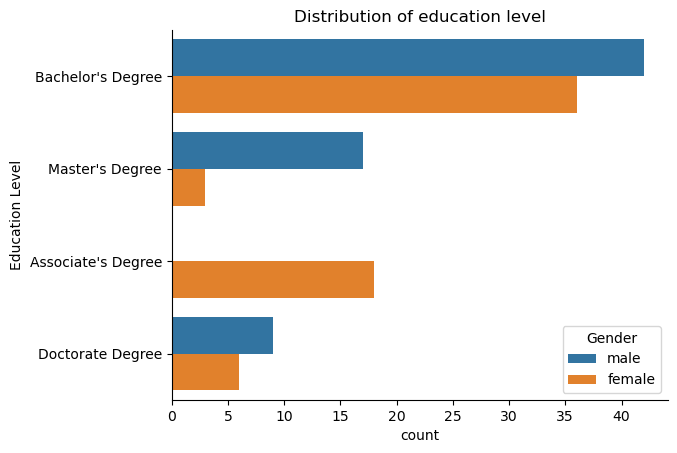

In [5]:
sns.countplot(data = df, y = "Education Level", hue = "Gender",
              order = df['Education Level'].value_counts().index)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of education level")

plt.show()

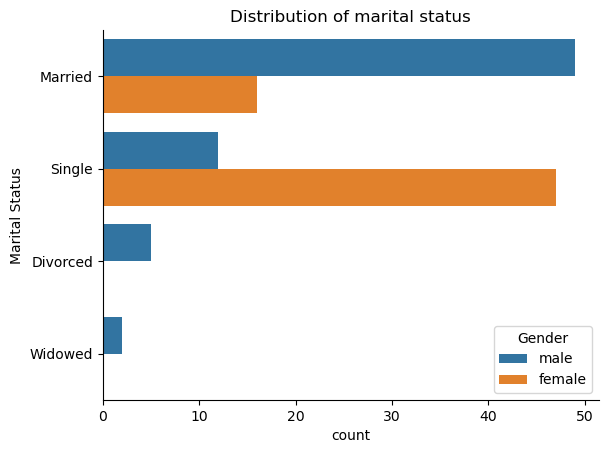

In [6]:
sns.countplot(data = df, y = "Marital Status", hue = "Gender", 
              order = df['Marital Status'].value_counts().index)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of marital status")
plt.show()

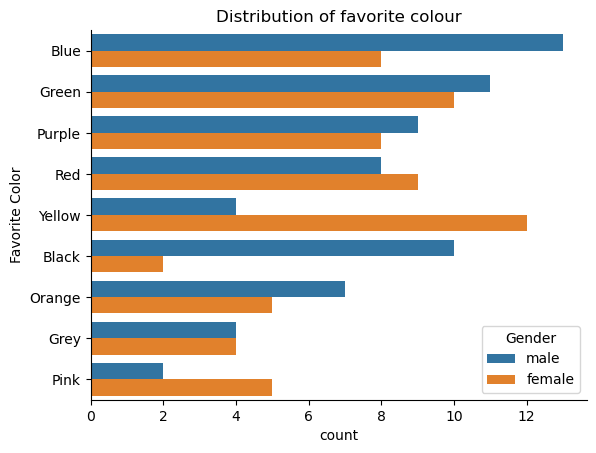

In [7]:
sns.countplot(data = df, y = "Favorite Color", hue = "Gender", 
              order = df['Favorite Color'].value_counts().index)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Distribution of favorite colour")

plt.show()

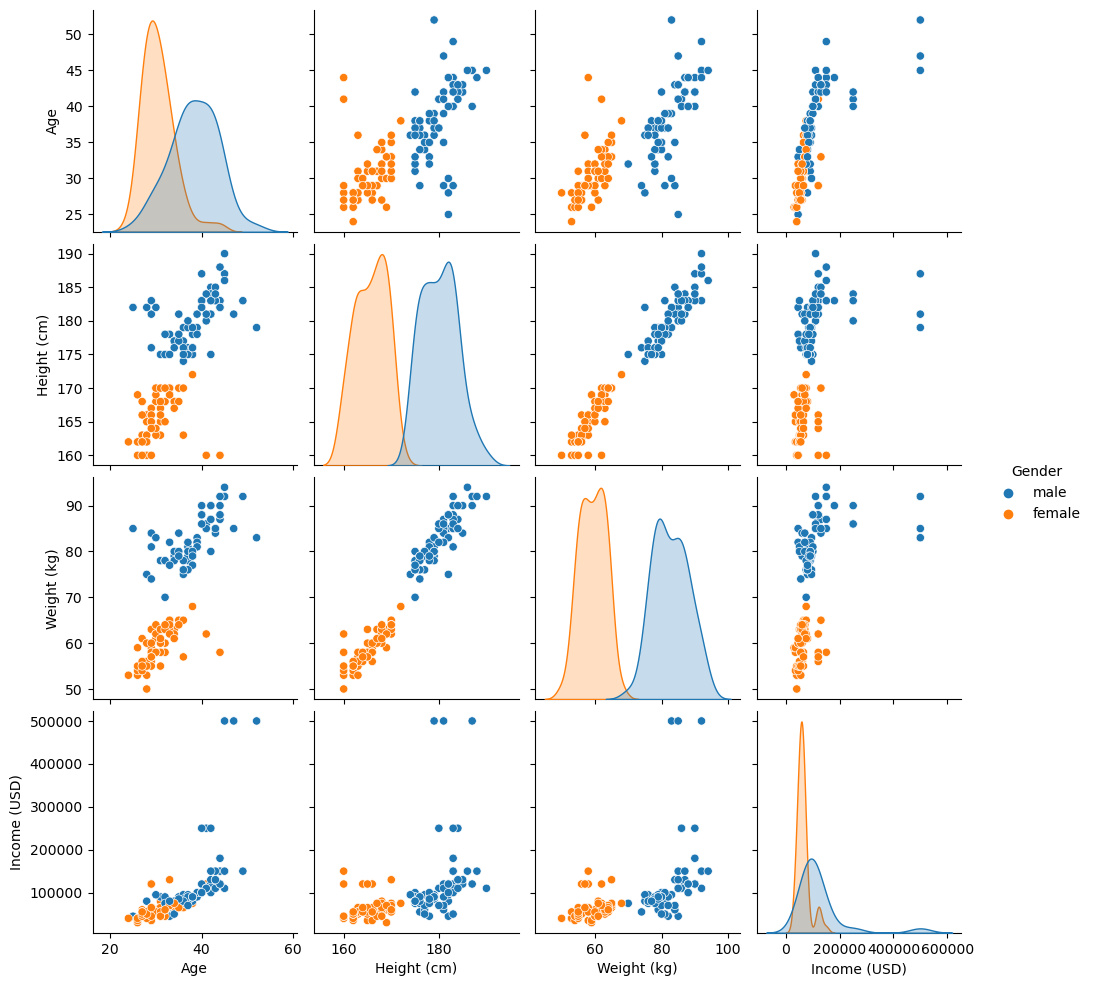

In [8]:
sns.pairplot(df, hue = "Gender")

plt.show()

With the data cleaned and evaluated a model can be established. Although a typical modelling process would involve using training and test dataset, evaluations and adjustments, for the task outlined by Jack, such actions are not required. Subsequently a basic decision tree model will construct the following: 

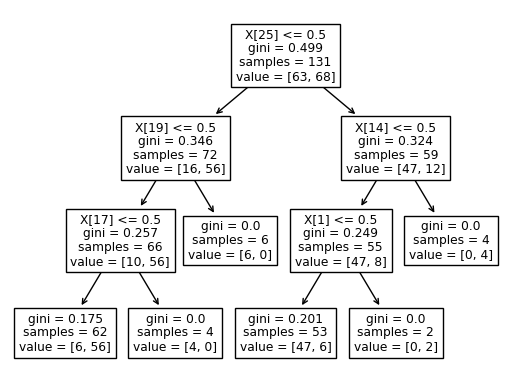

In [9]:
from sklearn.tree import DecisionTreeClassifier

#seperate target and input variables
x= df.drop("Gender", axis =1)
y= df["Gender"]

# isolate numercial and catagorial variables
numCols = x.select_dtypes("int64").columns
catCols = x.select_dtypes("object").columns

# import libraries to transform the data 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# transform catagorical data 
t= ColumnTransformer([
    ("cat", OneHotEncoder(), catCols)
])

Train_features  = t.fit_transform(x)

#create decision tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=360)
tree_clf.fit(Train_features,y)

#draw resulting tree
from sklearn import tree

tree.plot_tree(tree_clf);